# Data Mining, Lecture 3

## Handling data with Pandas

pandas contains high-level data structures and manipulation tools designed to make data
analysis fast and easy in Python. 

pandas is built on top of NumPy and makes it easy to
use in NumPy-oriented applications.

Here are some of the major features pandas provides:

* Data structures with labeled axes supporting automatic or explicit data alignment.
  This prevents common errors resulting from misaligned data and working with
  differently-indexed data coming from different sources.
* Integrated time series functionality
* The same data structures handle both time series data and non-time series data.
* Arithmetic operations and reductions (like summing across an axis) would pass
  on the metadata (axis labels)
* Flexible handling of missing data.
* Merge and other relational operations found in popular database databases (SQL-
  based, for example).
---

Let's start and import pandas

In [1]:
from pandas import DataFrame, Series
from io import StringIO 
import pandas as pd
import numpy as np
import os

from IPython.display import Image
IMG_PATH, DATA_PATH = "./img", "./data"


def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name, type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))


hrule = lambda x : "="*x
Hrule = lambda x,y: "="*(x//2)+y+"="*(x//2)
Data = lambda file : os.path.join(DATA_PATH, file)
Img  = lambda img : os.path.join(IMG_PATH, img)

## Introduction to pandas Data Structures

To get started with pandas, you will need to get comfortable with its two workhorse
data structures: Series and DataFrame.  ---- riscrivere ----

### Series
A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its ``index``. 

The simplest example of pandas Series is just a NumPy array

In [2]:
obj = Series(np.arange(10))
describe(obj)

data:
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
shape:(10,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


---

**Note**: Likewise vanilla numpy array, a Series object also has a dtype and a shape.

---
When we print a Series object, the index associated with each data cotained in the
Series is also printed on the leftside.

Since in the previous case we did not specify any index, by default pandas assign
all the integers within the interval $0$ and $N-1$ ($N$ is the length of the object).

We can also separately access to indexes ad values of a Series object with:

In [3]:
print(obj.index, obj.values)

RangeIndex(start=0, stop=10, step=1) [0 1 2 3 4 5 6 7 8 9]


Very often, it will be desirable to create a Series with an index identifying each data point.

You can specify the index during the Series creation as follows:

In [5]:
obj = Series([1,2,3,4], index=list('abcd'))
describe(obj)
print(obj['a'])

data:
a    1
b    2
c    3
d    4
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
1


Compared with a regular NumPy array, you can use values in the index when selecting
single values or a set of values. 

Likewise NumPy arrays, a Series object accept all the indexing strategies
available for a normal array.

---

**Exercise** - Get Familiar with Series.

In [ ]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [6]:
'''
A new Series from obj.
    Result
    -----
    values = [4,4,4,7,3]

Hint: Fancy indexing
''' 
describe(obj[['a', 'a', 'a', 'b', 'c']])
print(hrule(20))
'''
A series containing only the
positive values
    Result
    -----
    values = [4,7,3]
''' 

describe(obj[obj>0])
print(hrule(20))

'''
    Result
    ------
    values = [16, 49, 25, 9]
'''

describe(np.power(obj,2))
print(hrule(20))

data:
a    1
a    1
a    1
b    2
c    3
dtype: int64
shape:(5,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
a    1
b    2
c    3
d    4
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
a     1
b     4
c     9
d    16
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


---

It should be noted that a Series looks like a fixed-length, ordered dict, 
as it is a mapping of index values to data values. 

As a result, it can be substituted into many functions that expect a
dict:

In [7]:

obj = Series(
    [1,2,3,4,5,6,7],
    index=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']),
)

# Note: 1 key multiple values
print(obj['Joe']) # access like a dict 
print(hrule(20))

print(obj.Joe)  # access as an object field
print(hrule(20))

# test membership
print('Joe' in obj)
print('Frank' in obj)

Joe    2
Joe    6
Joe    7
dtype: int64
Joe    2
Joe    6
Joe    7
dtype: int64
True
False


**Note**: Unlike built-in python dict the index is not unique. Several values can be associated with the same index

---
It is also straightforward to construct a Series from a Python dict.
You just need to pass the dict to the constructor

In [8]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
print(obj3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


It is worth noting that the index is ordered by default, unless we specify the exact order of the indices

In [9]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

obj = Series(sdata, index=states) 
describe(obj)

data:
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
shape:(4,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


**Note**: California is not included in the original dict sdata. For this reason in the Series object appears a NaN corresponding to the *California* index

---

We can obtain a mask for selecting all the (not)null values from the Series as

In [10]:
describe(obj.isnull()) # equivalently pd.isnull(obj)
print(hrule(20))

describe(pd.notnull(obj)) # equivalently obj.notnull

data:
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
shape:(4,)
dtype:bool
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
shape:(4,)
dtype:bool
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


Pandas Series allows the user to specify a name to be associated with both to the Series object and its correponding index.


In [11]:
obj.name = "population"
obj.index.name = "states"
describe(obj)


data:
states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64
shape:(4,)
dtype:float64
name:population
index-name:states
type:<class 'pandas.core.series.Series'>


A Series’s index can be altered in place by assignment:

In [13]:
obj = Series(
    [1,2,3,4,5,6,7],
    index=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']),
)
describe(obj)
print(hrule(50))
obj.index = ['Bob', 'Bob', 'Joe', 'Joe', 'Will', 'Joe', 'Will']
describe(obj)

data:
Bob     1
Joe     2
Will    3
Bob     4
Will    5
Joe     6
Joe     7
dtype: int64
shape:(7,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
Bob     1
Bob     2
Joe     3
Joe     4
Will    5
Joe     6
Will    7
dtype: int64
shape:(7,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


Indexes are immutable

In [14]:
obj.index[0] = 'Joe' # ops!

TypeError: Index does not support mutable operations

## DataFrame

A DataFrame represents a tabular, spreadsheet-like data structure containing an 
ordered collection of columns.

Each colummn can be of a different value type (numeric,
string, boolean, etc.). 

The DataFrame has both a row and columns index.

It can be thought of as a dict of Series (one for all sharing the same index).

---

There is a number of ways to construct a DataFrame.

One of the most common
starts from a dict of equal-length lists or NumPy arrays.

In [15]:
# each key will corresponds to a column of the DataFrame
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
df = DataFrame(data)  # Note: the index is automatically assigned 
describe(df)

data:
    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


You can rearrange the columns of the dataframe by explictly defining the exact order in which you want them to appear

In [16]:
df = DataFrame(data, columns=['year', 'state', 'pop'])
describe(df)

data:
   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


Likewise the Series, passing a column that isn’t contained in data will lead to a column of NaN


In [17]:
df = DataFrame(df, columns=['year', 'state', 'pop', 'dept'])
describe(df)

data:
   year   state  pop  dept
0  2000    Ohio  1.5   NaN
1  2001    Ohio  1.7   NaN
2  2002    Ohio  3.6   NaN
3  2001  Nevada  2.4   NaN
4  2002  Nevada  2.9   NaN
shape:(5, 4)
type:<class 'pandas.core.frame.DataFrame'>


## Accessing to a DataFrame

### Accessing the column
You can directly access to a column of the DataFrame using a dict-like or attribute-like notation. 
Pandas will return a Series object **whose index corresponds to the one in the original dataframe**.


In [18]:
describe(df.state)
print(hrule(20))
describe(df['state']) 

data:
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object
shape:(5,)
dtype:object
name:state
index-name:None
type:<class 'pandas.core.series.Series'>
data:
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object
shape:(5,)
dtype:object
name:state
index-name:None
type:<class 'pandas.core.series.Series'>


Column indexing can also be used for adding a new column

In [20]:
df['density'] = 10 # broadcast a scalar value
describe(df)
print(hrule(30))

df['density'] = np.arange(df.shape[0]) # we can also use a ndarray
describe(df)
print(hrule(30))

df['density'] = Series(np.arange(df.shape[0]), index=np.flip(np.arange(df.shape[0]))) # Pay Attention
describe(df)

data:
   year   state  pop  dept  density
0  2000    Ohio  1.5   NaN       10
1  2001    Ohio  1.7   NaN       10
2  2002    Ohio  3.6   NaN       10
3  2001  Nevada  2.4   NaN       10
4  2002  Nevada  2.9   NaN       10
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>
data:
   year   state  pop  dept  density
0  2000    Ohio  1.5   NaN        0
1  2001    Ohio  1.7   NaN        1
2  2002    Ohio  3.6   NaN        2
3  2001  Nevada  2.4   NaN        3
4  2002  Nevada  2.9   NaN        4
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>
data:
   year   state  pop  dept  density
0  2000    Ohio  1.5   NaN        4
1  2001    Ohio  1.7   NaN        3
2  2002    Ohio  3.6   NaN        2
3  2001  Nevada  2.4   NaN        1
4  2002  Nevada  2.9   NaN        0
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


When assigning lists or arrays to a column the length must match. 

When you assign a Series, its index must match with the one of the DataFrame.

---

**Excercise** - Look at those NAN. Please, figure it out a solution!

In [24]:
df.index = list('abcde')
describe(df)

data:
   year   state  pop  dept  density
a  2000    Ohio  1.5   NaN        4
b  2001    Ohio  1.7   NaN        3
c  2002    Ohio  3.6   NaN        2
d  2001  Nevada  2.4   NaN        1
e  2002  Nevada  2.9   NaN        0
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


In [25]:
'''
Result
------
  year   state  pop  density
a  2000    Ohio  1.5        0
b  2001    Ohio  1.7        1
c  2002    Ohio  3.6        2
d  2001  Nevada  2.4        3
e  2002  Nevada  2.9        4

'''
df['density'] = Series(np.arange(5), index=list('abcde'))
describe(df)

data:
   year   state  pop  dept  density
a  2000    Ohio  1.5   NaN        0
b  2001    Ohio  1.7   NaN        1
c  2002    Ohio  3.6   NaN        2
d  2001  Nevada  2.4   NaN        3
e  2002  Nevada  2.9   NaN        4
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


**Note**: the Series object returned is actually a *view* on the original data, thus any change to that object will be reflected
on the dataframe (unless we call copy() the Series)

In [31]:
df['state'][0] = 'New York'
print(df.state)
print(df.state[0])
print(df.state['a'])
describe(df)

a    New York
b        Ohio
c        Ohio
d      Nevada
e      Nevada
Name: state, dtype: object
New York
New York
data:
   year     state  pop  dept  density
a  2000  New York  1.5   NaN        0
b  2001      Ohio  1.7   NaN        1
c  2002      Ohio  3.6   NaN        2
d  2001    Nevada  2.4   NaN        3
e  2002    Nevada  2.9   NaN        4
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


/home/antonio/App/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


---
**Wait a minute! What the heck is this Warning?**

Firt of all, it is just a warning and not an error. 
thusm, you can look the other way, none will blame you!

While an error indicates that something is broken, 
such as invalid syntax or an attempt to reference an undefined variable, 
the job of a warning is to alert the programmer to potential bugs or issues with their 
code that are still permitted operations within the language. 


*SettingWithCopyWarning* informs you that
your operation might not have worked as expected, thus you 
should check the result to make sure you haven’t made a mistake.

To understand what SettingWithCopyWarning is about, 
it’s helpful to understand that some actions in pandas can return a view of your data, 
while others instructions will return a copy.

Therefore this Warning is a kind suggestion to check whether
the issued instruction has worked as you expected to do.

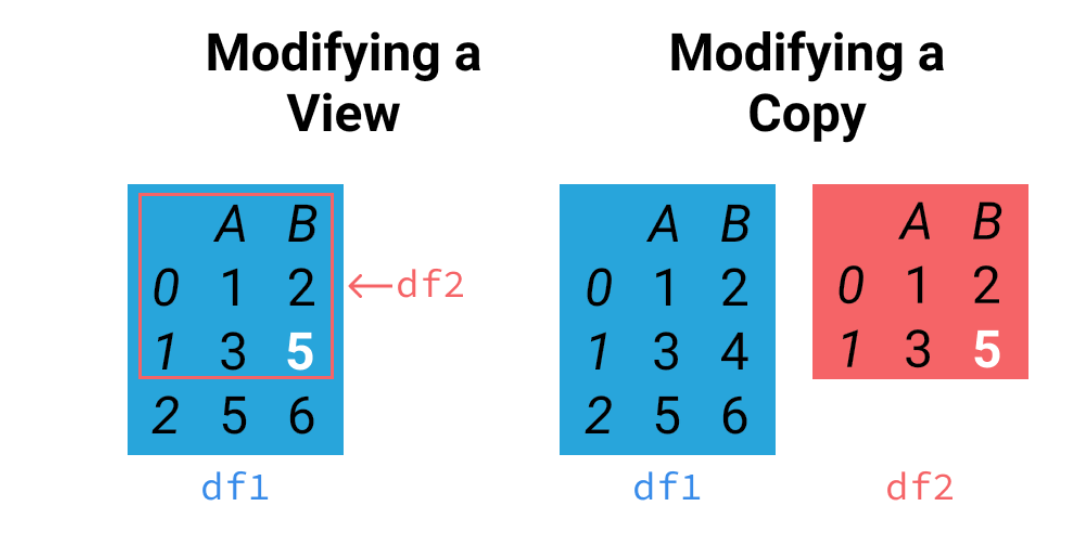

In [32]:
Image(os.path.join(IMG_PATH, 'viewvscopy.png'), width=500)

---
### Accessing via iloc vs. loc
Let's create another DataFrame and try to access to the first row with a dict-like notation

In [ ]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=np.flip(np.arange(0, len(next(iter(data)))))) # LOOK: the index is in reverse order

In [ ]:
df[0] #ops

You can access to a row of the dataframe you must use one of the two following functions:

**iloc**

iloc gets rows (or columns) at particular positions in the index (so it takes integers or boolean arrays)
    
    

In [33]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=np.flip(np.arange(0, len(next(iter(data)))))) # LOOK: the index is in reverse order

In [38]:
describe(df)
print(hrule(20))

print("index: {}".format(df.index))


print(Hrule(20, "First Element"))
print(df.iloc[0]) 
print(Hrule(20, "Element with index 4"))
print(df.loc[4])


print(Hrule(20, "Second Element"))
print(df.iloc[1])


print(Hrule(20, "state value of element with index 3"))
print(df.iloc[1]['state'])
print(hrule(5))
print(df.iloc[1, 1]) # 1 because 'state' is the column with index 1
print(df.iloc[1].state) # accessing a field


data:
   year   state  pop
4  2000    Ohio  1.5
3  2001    Ohio  1.7
2  2002    Ohio  3.6
1  2001  Nevada  2.4
0  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>
index: Int64Index([4, 3, 2, 1, 0], dtype='int64')
==========First Element==========
year     2000
state    Ohio
pop       1.5
Name: 4, dtype: object
==========Element with index 4==========
year     2000
state    Ohio
pop       1.5
Name: 4, dtype: object
==========Second Element==========
year     2001
state    Ohio
pop       1.7
Name: 3, dtype: object
==========state value of element with index 3==========
Ohio
=====
Ohio
Ohio




**loc**

gets rows (or columns) with particular labels from the index.


In [39]:
df_ = DataFrame(data, columns=['year', 'state', 'pop'], index=[chr(x) for x in range(97, 97+len(next(iter(data))))]) # LOOK: the index is in reverse order
describe(df_)


data:
   year   state  pop
a  2000    Ohio  1.5
b  2001    Ohio  1.7
c  2002    Ohio  3.6
d  2001  Nevada  2.4
e  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [41]:
print(Hrule(20, "Element with index a"))
describe(df_.loc['a'])

print(Hrule(20, "Element with index b, year"))
print(df_.loc['a']['pop']) 
print(hrule(5))
print(df_.loc['a', 'pop']) # the same as above


==========Element with index a==========
data:
year     2000
state    Ohio
pop       1.5
Name: a, dtype: object
shape:(3,)
dtype:object
name:a
index-name:None
type:<class 'pandas.core.series.Series'>
==========Element with index b, year==========
1.5
=====
1.5


----
**Exercise**

Get familiar with dataframe indexing.




In [42]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=[chr(x) for x in range(97, 97+len(next(iter(data))))])
describe(df)

data:
   year   state  pop
a  2000    Ohio  1.5
b  2001    Ohio  1.7
c  2002    Ohio  3.6
d  2001  Nevada  2.4
e  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [43]:
df['state'].values

array(['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], dtype=object)

In [52]:
'''
Result
------
    a    2000
    b    2001
    c    2002
    d    2001
    e    2002
Requirement: Dict-like access
''' 
describe(
    df['year']['b']# your code here 
)
print(hrule(20))

'''
Result
-----
    'Ohio' of the second element
Requirement: Object-like access + dict-like access
''' 
describe(
    df.state['b'] #your code here
)
describe(
    df.loc['b','state']# your code here 
)


2001, type:<class 'numpy.int64'>
Ohio, type:<class 'str'>
Ohio, type:<class 'str'>


In [56]:
'''
Result
------
    year       2000
    state      Ohio
    pop         1.5
'''
describe(
    df.loc['a']# your code here
)
print(hrule(20))
describe(
    df.iloc[0]# your code here
)


data:
year     2000
state    Ohio
pop       1.5
Name: a, dtype: object
shape:(3,)
dtype:object
name:a
index-name:None
type:<class 'pandas.core.series.Series'>
data:
year     2000
state    Ohio
pop       1.5
Name: a, dtype: object
shape:(3,)
dtype:object
name:a
index-name:None
type:<class 'pandas.core.series.Series'>


In [53]:
'''
Result
------
    year    2000
    pop      1.5
    Name: a
Hint: Fancy Indexing
'''
describe(
    # your code here
)
print(hrule(20))


'''
Result
------
  array([2001, 'Nevada', 2.4], dtype=object)
Hint: .values
'''
describe(
    # your code here
)
print(hrule(20))


'''
Result
------
     array([2001, 2.4], dtype=object) (the fourth element)
Hint: .values
'''
describe(
    # your code here
)
print(hrule(20))


'''
Result
------
    array([[2000, 'Ohio', 1.5],
       [2001, 'Ohio', 1.7],
       [2002, 'Ohio', 3.6],
       [2001, 'Nevada', 2.4],
       [2002, 'Nevada', 2.9]], dtype=object)

The entire dataframe as a ndarray
'''
describe(
    # your code here
)

data:
year     2000
state    Ohio
pop       1.5
Name: a, dtype: object
shape:(3,)
dtype:object
name:a
index-name:None
type:<class 'pandas.core.series.Series'>


TypeError: describe() missing 1 required positional argument: 'a'

## Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata
(like the axis name or names). 

Any array or other sequence of labels used when constructing a Series or DataFrame is internally converted to an Index


In [57]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index

print(index)


Index(['a', 'b', 'c'], dtype='object')


Index objects are immutable and thus can’t be modified by the user:

In [59]:
index[1] = 'c' # ops


TypeError: Index does not support mutable operations

A DataFrame is associated with an index for each one of its axes

In [60]:
print(df.index) # row index
print(df.columns) # column index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['year', 'state', 'pop'], dtype='object')



The following table contains the Main Index objects in pandas

|Class|Description|
|:-:|:-:|
|Index |The most general Index object, representing axis labels in a NumPy array of Python objects. |
|Int64Index | Specialized Index for integer values. |
|MultiIndex | “Hierarchical” index object representing multiple levels of indexing on a single axis. Can be thought of as similar to an array of tuples.|
|DatetimeIndex | Stores nanosecond timestamps (represented using NumPy’s datetime64 dtype).|
|PeriodIndex | Specialized Index for Period data (timespans).|


The following table contains a list of useful index methods

|Method| Description|
|:-:|:-:|
|append | Concatenate with additional Index objects, producing a new Index|
|diff |Compute set difference as an Index|
|intersection |Compute set intersection|
|union |Compute set union|
|isin |Compute boolean array indicating whether each value is contained in the passed collection|
|delete| Compute new Index with element at index i deleted|
|drop |Compute new index by deleting passed values|
|insert| Compute new Index by inserting element at index i|
|is_monotonic| Returns True if each element is greater than or equal to the previous element|
|is_unique| Returns True if the Index has no duplicate values|
|unique |Compute the array of unique values in the Index|


## Essential Functionality
A list of fundamental mechanics of interacting with
the data contained in a Series or DataFrame

### Reindexing
Create a new object
with the data conformed to a new index

In [61]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
describe(obj)
print(Hrule(20, "Reindexing"))
obj2 = obj.reindex(['a','a', 'b','b', 'd','c','d'])
describe(obj2)

data:
d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
shape:(4,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
==========Reindexing==========
data:
a   -5.3
a   -5.3
b    7.2
b    7.2
d    4.5
c    3.6
d    4.5
dtype: float64
shape:(7,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


The element of the original object are arrenged according to the list passed to ``reindex``.

We can also insert new index-element with default values. In such scenario pandas will
insert the default value iff the new index is not in the original Series object


In [62]:
obj2 = obj.reindex(['a', 'z']) # NaN as defualt behavior
describe(obj2)
print(hrule(20))
obj2 = obj.reindex(['a', 'z'], fill_value = -1) # full with -1
describe(obj2)

data:
a   -5.3
z    NaN
dtype: float64
shape:(2,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
a   -5.3
z   -1.0
dtype: float64
shape:(2,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


``reindex`` works with pandas dataframe as well. 

It always returns a copy of the original data

In [63]:
df = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
describe(df)
print(Hrule(20, "Reindexing rows"))
df_ = df.reindex(['a', 'b', 'c', 'd']) # reindexing rows
describe(df_)
print(Hrule(20, "Reindexing columns"))
df_ = df.reindex(columns=['Texas', 'Ohio', 'Ohio'])
describe(df_)
print(Hrule(20, "Reindexing rows & columns"))
df_ = df.reindex(index=['a','a','b'], columns=['Texas', 'Ohio', 'Ohio'])
describe(df_)

data:
   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>
==========Reindexing rows==========
data:
   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>
==========Reindexing columns==========
data:
   Texas  Ohio  Ohio
a      1     0     0
c      4     3     3
d      7     6     6
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>
==========Reindexing rows & columns==========
data:
   Texas  Ohio  Ohio
a    1.0   0.0   0.0
a    1.0   0.0   0.0
b    NaN   NaN   NaN
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>


### Dropping entries from an axis
Dropping one or more entries from an axis is easy if you have an index array or list
without those entries.

The drop
**method returns a new object** with the selected value or values deleted from an axis:

In [ ]:
df = DataFrame(np.arange(16).reshape((4, 4)),
                index=['Ohio', 'Colorado', 'Utah', 'New York'],
                columns=['one', 'two', 'three', 'four'])

df_ = df.drop(['Colorado', 'Utah']) #dropping rows
describe(df_)
print(hrule(20))
df_ = df.drop(['one','four'], axis=1) # dropping columns
describe(df_)

### Indexing, selection, and filtering

It is very similar to numpy, therefore we can use slicing, fancy indexing and boolean indexing (See Lecture 2).

---
**Exercises**: Play around with the indexing strategies you already know.

In [ ]:
obj = Series(np.arange(4.), index=reversed(['a', 'b', 'c', 'd']))
df =DataFrame(np.arange(16).reshape((4, 4)),
              index=['Ohio', 'Colorado', 'Utah', 'New York'],
              columns=['one', 'two', 'three', 'four'])
print(Hrule(20, "Series"))
describe(obj)

print(Hrule(20, "DataFrame"))
describe(df)

In [ ]:
'''
The first element of the series (positional indexing)
Result
------
    0
'''
describe(
    #your code here
)
print(hrule(20))

'''
The d-element of the series
Result
-----
    0
'''
describe(
    #your code here
)
print(hrule(20))


'''
All the elements within d and c
Result
------
    d 0
    c 1

Hint: slice operator    
'''
describe(
    # your code here 
)
print(hrule(20))

'''
Return all the elements less or equal to 2
Result
------
    a    0.0
    b    1.0
''' 
describe(
    # your code here 
)
print(hrule(20))

'''
Set all the elements between
the firsts and the last-1 element
of obj to -1
'''
describe(
    # your code here 
)
print(hrule(20))

'''
Select the first two rows
of the dataframe
'''
describe(
    # your code here 
)
print(hrule(20))


'''
Select all the element of
the dataframe with value greater
than 3 in column 'three'

Requirements: Give me at least two different ways

Hints: use a mask for the first method.
       Combine boolean indexing on the rows with the iloc function
'''
describe(
    # your code here 
)
print(hrule(20))
describe(
    # your code here 
)
print(hrule(20))


'''
As before, all the columns except
the last one
'''
describe(
    # your code here 
)
print(hrule(20))


'''
As before, all the rows until
"Utah". All the columns within
"two" and "three".

Hint: use loc function
'''
describe(
    # your code here 
)

---
## Arithmetic and data alignment
There is only one important aspect that you need to be aware of:
the behavior of, i.e., the arithmetic between objects with different indexes. 

When adding together objects, if any index pairs are not
the same, the respective index in the result will be the union of the index pairs. 

Let’s
look at a simple example:

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
describe(s1+s2) 

DataFrames have the same behavior

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

describe(df1 + df2)

We can avoid this ugly NaN values by specifying a fill_value

In [ ]:
# fill the NaN corresponding to index mismatching
tmp = df1.add(df2, fill_value=0)
describe(tmp) 
print(hrule(30))

# fill the NaN corresponding to missing columns
tmp_columns = df2.columns.union(df1.columns)   # set operations between index
tmp = df1.reindex(columns=tmp_columns, fill_value=0)
describe(tmp)

#### Operations between DataFrame and Series

By default, arithmetic between DataFrame and Series matches the index of the Series
on the DataFrame's columns, broadcasting down the rows:

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

describe(frame)
print(hrule(20))

describe(series)
print(hrule(20))

describe(frame-series)

### Function application and mapping

NumPy ufuncs (element-wise array methods) work fine with pandas objects.


In [ ]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
describe(frame)
print(hrule(50))
describe(np.abs(frame))
print(hrule(50))
f = lambda x :  x.max() - x.min()
describe(frame.apply(f, axis=0)) # compute f over each column
print(hrule(50))
describe(frame.apply(f, axis=1)) # compute f over each row

**Note**: Many of the most common array statistics (like sum and mean ) are DataFrame methods,
so, unless you want to apply your own function, using ``apply`` is not necessary.

The function passed to apply need not return a scalar value, it can also return a Series or a ndarray
with multiple values:

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

def f_(x):
    return [x.min(), x.max()] # it is better to use a Series

frame = DataFrame(np.random.randint(0,100,12).reshape(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
describe(frame)
print(hrule(20))

describe(frame.apply(f))
print(hrule(50))
describe(frame.apply(f, axis=1))

So far, we have applied function axis-wise. 

It is not the only way,
element-wise Python functions can be used, too. 

Suppose you want to compute a
formatted string from each floating point value in ``frame``. You can do this with **map**

---
**Exercise**

Get familiar with element-wise functions

In [ ]:
pow2 = #compute the square 
sqrt = # compute the square root

'''
Apply pow2 element-wise over frame
'''
describe(
    #your code here
)
print(hrule(20))
'''
Add a column to frame whose values are
the square root of the b column
'''
describe(
    #your code here
)
print(hrule(20))

'''
Comput min, mean, std, max
along axis 1 as a new data frame
Hint: define a new function
'''
df_ = #your code here
describe(
    df_
)
print(hrule(20))


'''
Add a new columnto frame, call it new.
This new column must contains the following
string:
    The number is 'x'
where 'x' is the value taken from the first column
'''
frame['new'] = #your code here
describe(
    frame
)


In [ ]:
def f50(x):
    return np.where(x>50, 0, x)
frame_= frame.apply(f50)
frame_['new'] = frame_.b.map({0:'B'}, na_action='ignore')

describe(frame_)

### Sorting and ranking

Sorting a data set by some criterion is another important built-in operation.

To sort lexicographically by row or column index, use the sort_index method, which returns
a new, sorted object


In [64]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
frame = DataFrame(np.arange(8).reshape((2, 4)), 
                  index=['three', 'one'], columns=list("dabc"))

print(Hrule(20, "Sorting Series"))
sorted_obj = obj.sort_index() # sort_index returns a copy
describe(sorted_obj) # lex-sorting

'''
With DatFrames we can choose the
axis upon wich performing the sorting operation
'''
print(Hrule(20, "Sorting Data-Frames"))
sorted_frame_ax0 = frame.sort_index() # default axis=0
describe(sorted_frame_ax0)
print(hrule(50))

sorted_frame_ax1 = frame.sort_index(axis=1, ascending=False)
describe(sorted_frame_ax1)

==========Sorting Series==========
data:
a    1
b    2
c    3
d    0
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
==========Sorting Data-Frames==========
data:
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
shape:(2, 4)
type:<class 'pandas.core.frame.DataFrame'>
data:
       d  c  b  a
three  0  3  2  1
one    4  7  6  5
shape:(2, 4)
type:<class 'pandas.core.frame.DataFrame'>


To sort a Series by its *values*, use the *sort_vales* method:

In [65]:
obj = Series([4,3,2,1,np.NaN], index=list("cdabs"))
objA = obj.sort_values(ascending=True) # it always returns a copy
objD = obj.sort_values()  # by default ascending=False
describe(objA) 
print(hrule(20))
describe(objD)   

data:
b    1.0
a    2.0
d    3.0
c    4.0
s    NaN
dtype: float64
shape:(5,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
b    1.0
a    2.0
d    3.0
c    4.0
s    NaN
dtype: float64
shape:(5,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


**Note**: NaNs are always pushed to the end of the Series, regardless of the order.

----
### Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods.

Most of these fall into the category of reductions or summary statistics, methods
that extract a single value (like the sum or mean) from a Series or a Series of values
from the rows or columns of a DataFrame. 

The main additional fueature provided by pandas
methods if compared with the similar methods
found on NumPy arrays, is the handling for missing data.

Beside all the classic methods for computing statical information
along each axis of a datafame, there are two very useful methods that
allow us to understand the data we are given with very quickly.

These methods are:

In [66]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])

df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
one    3 non-null float64
two    2 non-null float64
dtypes: float64(2)
memory usage: 96.0+ bytes


The ``describe`` method provides summary statistics all at once, while the ``info`` method
provides information about the type of data stored in the dataframe and about
the presence of missing-vale with respect to any column of the dataframe.

The following table describes all the major statistical methods for 
pandas DataFrame and Serires

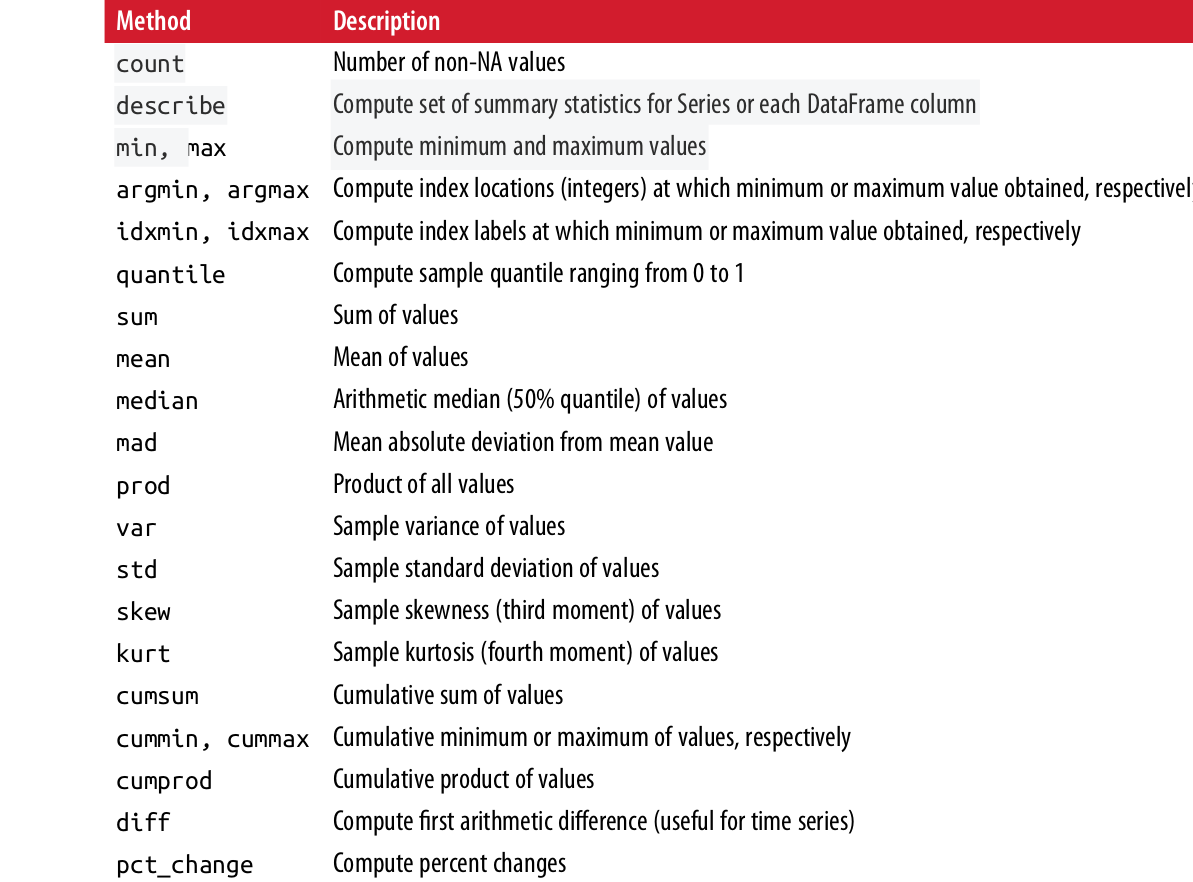

In [68]:
Image(os.path.join(IMG_PATH, 'statistics.png'), width=500)

### Unique Values, Value Counts, and Membership
Another class of related methods extracts information about the values contained in a
one-dimensional Series. To illustrate these, consider this example:

In [69]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

uniqe_values = obj.unique() # return all distinct values as a ndarray

describe(uniqe_values)
print(hrule(30))

# return a Series containing counts of unique values
value_count = obj.value_counts(sort=True) 
describe(value_count)

data:
['c' 'a' 'd' 'b']
shape:(4,)
dtype:object
type: <class 'numpy.ndarray'>
data:
c    3
a    3
b    2
d    1
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


The unique values are not necessarily returned in sorted order, but could be sorted
after the fact if needed ( ``uniques.sort()`` ).

In [70]:
uniqe_values.sort()
describe(uniqe_values)

data:
['a' 'b' 'c' 'd']
shape:(4,)
dtype:object
type: <class 'numpy.ndarray'>


The following table describes several methods related
to sets operation with Series

|Method|Description|
|--|--|
| isin |Compute boolean array indicating whether each Series value is contained in the passed sequence of values |
| match | Compute integer indices for each value in an array into another array of distinct values; helpful for data alignment and join-type operation |
| unique | Compute array of unique values in a Series, returned in the order observed |
| value_counts | Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order |


## Data Loading, Storage, and File Formats

pandas features a number of functions for reading tabular data as a DataFrame
object. 

The following table summarizes some of them, though ``read_csv`` and ``read_table`` are
likely the ones you’ll use the most.

| Function | Description |
|--|--|
|read_csv| Load delimited data from a file, URL, or file-like object; use comma as default delimiter |
|read_table| Load delimited data from a file, URL, or file-like object; use tab ( '\t' ) as default delimiter |
|read_fwf | Read data in fixed-width column format (i.e., no delimiters) |
|read_clipboard | Version of read_table that reads data from the clipboard; useful for converting tables from web pages|
|read_excel|Read tabular data from an Excel XLS or XLSX file |
|read_hdf | Read HDF5 files written by pandas |
|read_html | Read all tables found in the given HTML document |
|read_json | Read data from a JSON (JavaScript Object Notation) string representation |
|read_msgpack | Read pandas data encoded using the MessagePack binary format |
|read_pickle | Read an arbitrary object stored in Python pickle format |
|read_sas | Read a SAS dataset stored in one of the SAS system’s custom storage formats |
|read_sql | Read the results of a SQL query (using SQLAlchemy) as a pandas DataFrame |
|read_stata | Read a dataset from Stata file format |
|read_father |Read the Feather binary file format |

All of these funciton are meant to convert text data into a DataFrame. The optional arguments for these methods can be categorized
as:

> Indexing : Can treat one or more columns as the returned DataFrame, and whether to get
    column names from the file, the user, or not at all.
    
> Type inference and data conversion : This includes the user-defined value conversions and custom list of missing value
    markers    
    
> Datetime parsing : Includes combining capability, including combining date and time information spread over multiple columns into a single column in the result.

> Iterating : Support for iterating over chunks of very large files

> Unclead data issues : Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.

---

Let's focus on the (likely) only function you will use. 
You can read it as:

In [71]:
df = pd.read_csv(Data('ex1.csv'))
df.head()

,a,b,c,d,message
0,1,2,3,4,hello


In [72]:
!cat data/ex1.csv

a,b,c,d,message
1,2,3,4,hello


By default pandas interprets the first row as the one containing the name
of each column. Also, by default pandas uses ',' as the character separating each column. 

We can prevent this behavior in different ways:

In [74]:
df1 = pd.read_csv(Data('ex1.csv'), header=None) # the first row is considered as part of the data
df1.head(1)

,0,1,2,3,4
0,a,b,c,d,message


In [75]:
# this list contains the names of the column
# the first row is still considered as part of the data   
df2 = pd.read_csv(Data('ex1.csv'), 
                  names=["a1", "a2", "a3", "a4", "a5"])
df2.head()

,a1,a2,a3,a4,a5
0,a,b,c,d,message
1,1,2,3,4,hello


If you have a csv file with column separated by a tab, such as the following file:

In [76]:
!cat data/ex2.csv

a	b	c	d	message
1	2	3	4	hello
5	6	7	8	world
9	10	11	12	foo


You can either use ``pd.read_table`` or ``pd.read_csv``.

In [77]:
df = pd.read_table(Data('ex2.csv'))
df.head()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [78]:
df = pd.read_csv(Data('ex2.csv'), sep="\t")
df.head()

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suppose you want the ``message`` column to be the ``index`` of the returned DataFrame.

You can either indicate you want the column at index 4 (named ``message``) using
the ``index_col`` argument:

In [79]:
names = ['a', 'b', 'c', 'd', 'message']
df = pd.read_csv(Data('ex2.csv'), names=names, sep="\t", index_col='message')
print(df.head())
print(hrule(50))
# of course we can use
print(df.loc['hello'])

         a   b   c   d
message               
message  a   b   c   d
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12
a    1
b    2
c    3
d    4
Name: hello, dtype: object


**Note**: There is something wrong with the previous instruction.
The first row is wrongly interpreted as part of the data.
You can prevent this behavior with the ``skiprows`` argument. 

``skiprows`` accepts a list of integer, each one represents the position
of the row you want to skip.

In [81]:
df = pd.read_csv(Data('ex2.csv'), names=names, sep="\t", index_col='message', skiprows=[0])
df.head()

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Pandas' ``read_csv`` function has almost 50 different arguments. We do not have time for that! 

The following table summerizes some frequently used options related to both *read_csv* and *read_table*.

|Argument | Description|
|--|--|
| path | String indicating filesystem location, URL, or file-like object | 
|sep, delimiter | Character sequence or regular expression to use to split fields in each row |
| header | Row number to use as column names; defaults to 0 (first row), but should be None if there is no header row |
|index_col | Column numbers or names to use as the row index in the result; can be a single name/number or a list of them for a hierarchical index |
| names | List of column names for result, combine with header=None |
|skiprows | Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip. |
|na_values | Sequence of values to replace with NA. |
|comment | Character(s) to split comments off the end of lines. |
|parse_dates | Attempt to parse data to datetime ; False by default. If True , will attempt to parse all columns. |
|keep_date_col | If joining columns to parse date, keep the joined columns; False by default. |
|converters |  Dict containing column number of name mapping to functions (e.g., {'foo': f} would apply the function f to all values in the 'foo' column). |
|dayfirst | When parsing potentially ambiguous dates, treat as international format (e.g., 7/6/2012 -> June 7, 2012); False by default. |
|date_parser |  Function to use to parse dates. |
|nrows | Number of rows to read from beginning of file. |
|iterator | Return a TextParser object for reading file piecemeal. |
|chunksize | For iteration, size of file chunks. | 
|skip_footer | Number of lines to ignore at end of file. |
|verbose | Print various parser output information, like the number of missing values placed in non-numeric columns.|
|encoding | Text encoding for Unicode (e.g., 'utf-8' for UTF-8 encoded text).|
|squeeze | If the parsed data only contains one column, return a Series |
|thousands | Separator for thousands (e.g., ',' or '.' ). |


### Writing Data
It is very simple:

In [82]:
df = pd.read_table(Data('ex2.csv'))
df.to_csv(Data('ex2_.csv'))
!cat data/ex2_.csv

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Note the first column! By default pandas saves the index of the dataframe along with the data.

You can prevent this behavior as:

In [83]:
# index
df.to_csv(Data('ex2_.csv'), index=False)
!cat data/ex2_.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


You can also specify a different separator

In [84]:
df.to_csv(Data('ex2_.csv'), index=False, sep=";")
!cat data/ex2_.csv

a;b;c;d;message
1;2;3;4;hello
5;6;7;8;world
9;10;11;12;foo


If you want to skip the column names...

In [85]:
df.to_csv(Data('ex2_.csv'), index=False, sep=";", header=False)
!cat data/ex2_.csv

1;2;3;4;hello
5;6;7;8;world
9;10;11;12;foo


### Reading JSON

JSON (short for JavaScript Object Notation) has become one of the standard formats
for sending data by HTTP request between web browsers and other applications. It is
a much more free-form data format than a tabular text form like CSV. Here is an
example:


In [86]:
obj = """
[
{"a": 1, "b": 2, "c": 3},
{"a": 4, "b": 5, "c": 6},
{"a": 7, "b": 8, "c": 9}
]
"""
obj

'\n[\n{"a": 1, "b": 2, "c": 3},\n{"a": 4, "b": 5, "c": 6},\n{"a": 7, "b": 8, "c": 9}\n]\n'

The structure of a JSON object is very close to a built-in python array. 

In fact you can easily convert the two objects as:

In [87]:
import json
result = json.loads(obj)
print(result)

[{'a': 1, 'b': 2, 'c': 3}, {'a': 4, 'b': 5, 'c': 6}, {'a': 7, 'b': 8, 'c': 9}]


And cnvert it back as:

In [88]:
asjson = json.dumps(result)
#store it into a file
with open(Data('ex.json'), 'w') as f:
    f.write(asjson)
!cat data/ex.json

[{"a": 1, "b": 2, "c": 3}, {"a": 4, "b": 5, "c": 6}, {"a": 7, "b": 8, "c": 9}]

The pandas.read_json can automatically convert JSON datasets in specific arrangements into a Series or DataFrame. 

The default options for pandas.read_json assume that each object in the JSON array
is a row in the table:

In [89]:
df = pd.read_json(Data('ex.json'))
df.head()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


If you need to export data from pandas to JSON, one way is to use the to_json meth‐
ods on Series and DataFrame:


In [90]:
# if no path is specified the method return 
# the dataframe as a string
record_orientation = df.to_json(orient='records')
index_orientation = df.to_json(orient='index')
print("record:{}\nindex:{}".format(record_orientation, index_orientation))

record:[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]
index:{"0":{"a":1,"b":2,"c":3},"1":{"a":4,"b":5,"c":6},"2":{"a":7,"b":8,"c":9}}


## Interacting with Web APIs

Many websites have public APIs providing data feeds via JSON or some other format.
There are a number of ways to access these APIs from Python; one easy-to-use
method is the the **request** package.

Imagine you have to download a dataset from the web:

In [91]:
import requests
def download_data(url):
    resp = requests.get(url)
    if resp.status_code == 200:
        return pd.read_csv(StringIO(resp.text))
    return None
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = download_data(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


However, the easiest way it to pass the url directly to pandas

In [92]:
pd.read_csv(url).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Cleaning and Preparation

During the course of doing data analysis and modeling, a significant amount of time
is spent on data preparation: loading, cleaning, transforming, and rearranging. 

Such
tasks are often reported to take up 80% or more of an analyst’s time. 

Sometimes the
way that data is stored in files or databases is not in the right format for a particular
task.

### Handling Missing Data

One of the goals
of pandas is to make working with missing data as painless as possible. 

For example,
all of the descriptive statistics on pandas objects exclude missing data by default.

When a particular value is missing pandas places a ``NaN`` (i.e., the NumPy not-a-number) symbol which stands
for "Not Available"

In [93]:
from numpy import NaN as nan
obj = Series(['luka', 'doncic', nan, 'ROY', None]) 

describe(obj)

print(Hrule(20, "Select nan values"))
nulls = obj.isnull() # return a mask pointing to every missing value
describe(nulls)

data:
0      luka
1    doncic
2       NaN
3       ROY
4      None
dtype: object
shape:(5,)
dtype:object
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
==========Select nan values==========
data:
0    False
1    False
2     True
3    False
4     True
dtype: bool
shape:(5,)
dtype:bool
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


**Note**: the built-in ``None`` is treated as a ``NaN``.

#### Filtering Missing Data

While filtering missing data you can either use the mask returned by the ``isnull``
(there is also a method ``notnull``) or use the ``dropna`` function.
Here is an example:

In [94]:
not_null = obj.dropna() # it returns a copy
describe(not_null) # the row at index 2 has been removed


data:
0      luka
1    doncic
3       ROY
dtype: object
shape:(3,)
dtype:object
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


**Exercise**: write an equivalent method for removing null values from obj

In [100]:
describe(
    obj!=None
)

data:
0    True
1    True
2    True
3    True
4    True
dtype: bool
shape:(5,)
dtype:bool
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


As regard the DataFrame, when using the dropna method you must specify the axis along which you want to perform
the action. You can either remove rows or columns (entirely)

In [103]:
data = pd.DataFrame([[1., 6.5, 3.], [1., nan, nan], [nan, nan, nan], [nan, 6.5, 3.]])
describe(data)
describe(data.dropna(axis=1))

data:
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>
data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
shape:(4, 0)
type:<class 'pandas.core.frame.DataFrame'>


As you can see, by default pandas remove an entire record (a row or column) as it finds even just a single missing value.

As a consequence this single missing value can cause a massive loss of information. 
You override this behavior by specifying a different value for the ``how`` argument of ``dropna`` (by default it is ``'any'``)

In [104]:
describe(data.dropna(axis=0, how='all'))

data:
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>


Rather than removing entire recors we can decide to fill the missing values.

You can do it in several ways

In [107]:
describe(data.fillna(0)) # fillna returns a copy
print(hrule(50))

#different values ofor each column
describe(data.fillna({1: 0.5, 2:0})) 
print(hrule(50))

data.fillna(0, inplace=True) # modify the data frame in place

data:
     0    1    2
0  1.0  6.5  3.0
1  1.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  6.5  3.0
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>
data:
     0    1    2
0  1.0  6.5  3.0
1  1.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  6.5  3.0
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


### Removing Duplicates
Duplicate rows may be found in a DataFrame for any number of reasons. Here is an
example

In [108]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
print(df.head())

print(Hrule(20, "Get duplicated values"))
duplicated = df.duplicated() # return a mask 
print(duplicated)

    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
==========Get duplicated values==========
0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool


If you want to remove all the duplicated values you can use the *drop_duplicates* method.
drop_duplicates returns a new DataFrame whose value correspond to the 
value of the original DataFrame where the duplicated Series is False :

In [109]:
df.drop_duplicates() # the six entry is gone!

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


**Note**: By The membership is evaluated considering the entire row.
Alternatively, you can specify any subset of them to detect duplicates.
Suppose we had an additional column
of values and wanted to filter duplicates only based on the 'k1' column:

In [111]:
df.drop_duplicates(['k1'])

,k1,k2
0,one,1
1,two,1


The element that pandas keeps is always the first occurence of a given value. 
You can override this behavior as:

In [112]:
df.drop_duplicates(['k1'], keep='last')

,k1,k2
4,one,3
6,two,4


#### Transforming Data Using a Function or Mapping

For many datasets, you may wish to perform some transformation based on the values in an array, Series, or column in a DataFrame.

Consider the following hypothetical data collected about various kinds of meat

In [113]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suppose you wanted to add a column indicating the type of animal that each food
came from. Let’s write down a mapping of each distinct meat type to the kind of
animal

The map method on a Series accepts a function or dict-like object containing a map‐
ping, but here we have a small problem in that some of the meats are capitalized and
others are not. Thus, we need to convert each value to lowercase using the *str.lower*
Series method:

In [114]:
data['animal'] = data.food.str.lower()
data

,food,ounces,animal
0,bacon,4.0,bacon
1,pulled pork,3.0,pulled pork
2,bacon,12.0,bacon
3,Pastrami,6.0,pastrami
4,corned beef,7.5,corned beef
5,Bacon,8.0,bacon
6,pastrami,3.0,pastrami
7,honey ham,5.0,honey ham
8,nova lox,6.0,nova lox


Now we can pass the dict *meat_to_animal* to the map function over the desired column

In [115]:
data['animal'] = data.animal.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


**Exercise**: Create the animal column (call it ``animal_``) in one line of code

In [ ]:
# your code here

Although the *map* method can be used for replacing values in a DataFrame there is 
a more suitable way of doing it. In fact, you can use the replace function.

You can pass either a pair of scalar values, a pair of array-like values or a dict.

The replace function, unless you pass inplace=True, always returns a copy of the original data

In [116]:
obj = Series([1., -999., 2., -999., -1000., 3.])

obj.replace(-999, nan)
describe(obj)
print(hrule(50))

# the replacement is pairwise
obj.replace([-999, 2], [nan, -2], inplace=True)
describe(obj)

#the arguments don not need to have the same size
obj.replace([nan, -2],-10, inplace=True)
describe(obj)
                 
# you can also pass a dict
obj.replace({-10:-99999}, inplace=True)
describe(obj)

data:
0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64
shape:(6,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
0       1.0
1       NaN
2      -2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64
shape:(6,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
0       1.0
1     -10.0
2     -10.0
3     -10.0
4   -1000.0
5       3.0
dtype: float64
shape:(6,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>
data:
0        1.0
1   -99999.0
2   -99999.0
3   -99999.0
4    -1000.0
5        3.0
dtype: float64
shape:(6,)
dtype:float64
name:None
index-name:None
type:<class 'pandas.core.series.Series'>


**Exercise**

In [ ]:
df = DataFrame(np.random.randint(0,50,12).reshape(4, 3), columns=list('abc'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df = df.astype(np.float) # convert the dataset to floating point
df.values[[0,1,2], [0,2,0]] = nan
df

In [ ]:
'''
Create a new column 'd' where
there is 'Missing' if 
the corresponing row contains
a Nan in the column 'a', otherwise
'd' will contain the value 'not missing'

Hint: remember np.where?
'''


### Discretization and Binning

Continuous data is often discretized or otherwise separated into “bins” for analysis.

Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets

In [117]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
describe(cats)
print(hrule(50))
df = pd.DataFrame(np.column_stack([ages, cats]), columns=['Age', 'Bin'])
df

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]], type:<class 'pandas.core.arrays.categorical.Categorical'>


,Age,Bin
0,20,"(18, 25]"
1,22,"(18, 25]"
2,25,"(18, 25]"
3,27,"(25, 35]"
4,21,"(18, 25]"
5,23,"(18, 25]"
6,37,"(35, 60]"
7,31,"(25, 35]"
8,61,"(60, 100]"
9,45,"(35, 60]"


The object pandas returns is a special Categorical object. The output you see
describes the bins computed by pandas.cut . You can treat it like an array of strings
indicating the bin name; internally it contains a categories array specifying the dis‐
tinct category names along with a labeling for the ages data in the codes attribute:

In [118]:
print("codes:{}\ncategories:{}".format(cats.codes, cats.categories))

codes:[0 0 0 1 0 0 2 1 3 2 2 1]
categories:IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')


You can see the number of element inside each bin as:

In [119]:
print(cats.value_counts())
print(hrule(20))

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


The *cut* operation is of course highly customizable.
>If you specify *right=False* the intervals become closed to the left

>With *labels=[...list of group names...]* you can specify the name to assign to each group

>With the argument *precision* you can set the number of decimal value to take into account while ''binning'' the Series



In [120]:
df['Bin'] = pd.cut(ages,4,right=False, precision=0)
df['Label'] = pd.cut(ages,4, labels=['kid', 'teen', 'young', 'old'], right=False)
df

,Age,Bin,Label
0,20,"[20.0, 30.0)",kid
1,22,"[20.0, 30.0)",kid
2,25,"[20.0, 30.0)",kid
3,27,"[20.0, 30.0)",kid
4,21,"[20.0, 30.0)",kid
5,23,"[20.0, 30.0)",kid
6,37,"[30.0, 40.0)",teen
7,31,"[30.0, 40.0)",teen
8,61,"[51.0, 61.0)",old
9,45,"[40.0, 51.0)",young


Instead of passing a list of bins you can just specify the number of bins you whish to devide your data.
By default *cut* split the data accordingly to an equal-frequency strategy.

However if you wish to spiit the data in quantiles you can use the *qcut* function.


#### Permutation and Random Sampling

Permuting (randomly reordering) a Series or the rows in a DataFrame is easy to do
using the numpy.random.permutation function.

Calling permutation with the length
of the axis you want to permute produces an array of integers indicating the new
ordering.


In [ ]:
# it returns 10 number whitin [0,10) in random order
np.random.permutation(10)

**Exercise**: Use the permuation method to extract a subset from a dataframe (df)

In [ ]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
# your code here

A simpler way to reordering from the dataframe is via the functions *take*

In [ ]:
print(df.take(np.random.permutation(df.shape[0])))

___
Extracting a sample from the datafram is also very simple. 
You just need to use the *sample* function. 

To generate a sample with replacement (to allow repeat choices), pass replace=True (by default is False)
to sample:

In [ ]:
sample = df.sample(n=3, replace=True)
sample

## Computing Indicator/Dummy Variables

Another type of transformation for statistical modeling or machine learning applica‐
tions is converting a categorical variable into a “dummy” or “indicator” matrix. 

If a  column in a DataFrame has k distinct values, you would derive a matrix or Data‐
Frame with k columns containing all 1s and 0s. pandas has a get_dummies function
for doing this, though devising one yourself is not difficult. 



In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

In [ ]:
df_ = pd.get_dummies(df['key'], prefix='key') 
df_

Actually, we have just transforme the key-column into a one-hot encoding vector!

Now, you have a one-hot encoded dataframe. You may wonder how this can be included in the original
dataframe. Be patient we will see how to do it.


**Exercise**: replace the ``key`` with the one-hot encoded DataFrame

In [ ]:
# your code here

### Vectorized String Functions in pandas

Cleaning up a messy dataset for analysis often requires a lot of string munging and
regularization. To complicate matters, a column containing strings will sometimes
have missing data

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
    'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)
data

Any string and regular expression methods can be applied (passing a
lambda or other function) to each value using the *map* function.

However, you will struggle with NA
(null) values. 

To cope with this, Series has array-oriented methods for string operations that skip NA values. 

These are accessed through Series’s **str** attribute. In this way you can directly access
to the string underlying the each element stored in the Series object without considering
the NaN values.

In [ ]:
import re
# after accessing the str attribute you can
# perform any string-manipulation function (including regex)
print(data.str.contains('gmail')) 
print(hrule(20))

#extract different information from the string
#using regular expressions
print(data.str.findall('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))
print(hrule(20))

#check wheter or not a string repsect a certain pattern
print(data.str.match('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))
print(hrule(20))
#create a dataframe. Each column correspond to a matched group
describe(data.str.extract('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))

**Exercise**: Create a data frame starting from the data Series with two column:
the first column contains the username of a user, the second one contains the domain of the email-address

In [ ]:
def extract(series):
    first, second = series.str.split('@').str
    return pd.DataFrame({'username':first, 'domain': second}, index=series.index)
describe(extract(data))

Here is a table with almost every method for handling string objects

In [ ]:
Image(Img('tab.png'))

## Data Wrangling: Join, Combine, and Reshape
### Hierarchical Indexing

Hierarchical indexing is an important feature of pandas that enables you to have multiple (two or more) index levels on an axis. Somewhat abstractly, it provides a way for
you to work with higher dimensional data in a lower dimensional form. Let’s start
with a simple example; create a Series with a list of lists (or arrays) as the index:


In [ ]:
data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

What you’re seeing is a prettified view of a Series with a MultiIndex as its index. The
“gaps” in the index display mean “use the label directly above”:

In [ ]:
print(data.index)

With a hierarchically indexed object, so-called partial indexing is possible, enabling
you to concisely select subsets of the data:

In [ ]:
print(data['a'])
print(hrule(20))

print(data.loc[['b', 'd']])
print(hrule(20))

#inner level selection
print(data.loc['a':'b', 1:2])

Hierarchical indexing plays an important role in reshaping data and group-based
operations like forming a pivot table. For example, you could rearrange the data into
a DataFrame using its unstack method:

In [ ]:
df = data.unstack()
df

The first-level index becomes the axis-0 index while the inner-index becomes the axis-1 index (the columns).

You can also reverse the operation as:

In [ ]:
describe(df.stack())

---
With a DataFrame, either axis can have a hierarchical index:

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
print(frame)
print(hrule(30))
print(frame.loc['a',1])
print(hrule(30))
print(frame.loc[('b',1),'Ohio'])

#### Reordering and Sorting Levels
At times you will need to rearrange the order of the levels on an axis or sort the data
by the values in one specific level. The swaplevel takes two level numbers or names
and returns a new object with the levels interchanged

In [ ]:
# associate a label with each index
frame.index.names = ('key1', 'key2')
frame.columns.names = ['state', 'color']
print(frame)
print(Hrule(20, "swap indexes"))
swapped_frame = frame.swaplevel('key1', 'key2')
print(swapped_frame)

When swapping, pandas does not automatically sort the values of the data-frame
according to the new configuration.

Therefore, we need to use the *sort_index*. 

In [ ]:
print(swapped_frame.sort_index(level=0))
print(Hrule(20, "See the difference?"))
print(swapped_frame.sort_index(level=1))

Each level corresponds to a particular index.

In this case (after the swapping) key2 corresponds to level=0 while
key1 corresponds to level=1.

Actually, you do not need to name each index.
You can swap them by specifying their level.
```
 df.swaplevel(0,1)
```
**Exercise**: Make *swapped_frame* as the original fame

In [ ]:
#your code here

Many descriptive and summary statistics on DataFrame and Series have a level
option in which you can specify the level you want to aggregate by on a particular
axis.

In [ ]:
print(frame)
print(hrule(30))

print(frame.sum(level=1))
print(hrule(30))

print(frame.mean(level='color', axis=1))

### Indexing with a DataFrame’s columns
You ma  want to use one or more columns from a DataFrame as the row
index;

alternatively, you may wish to move the row index into the DataFrame’s col‐
umns.

Here’s an example DataFrame

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two',
    'two', 'two'],
    'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame_ = frame.set_index(['a','b'])
print(frame_)
print(hrule(20))
frame_ = frame.set_index(['c', 'd']).sort_index(level=[0,1], ascending=[True, False])
print(frame_)

By default the columns selected as index are removed from the DataFrame
However you can leave them:
```
frame.set_index(['c', 'd'], drop=False)
```

### Combining and Merging Datasets
Data contained in pandas objects can be combined together in a number of ways:

1. pandas.merge connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
2. pandas.concat concatenates or “stacks” together objects along an axis.
3. The combine_first instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

---

Merge or join operations combine datasets by linking rows using one or more keys.
These operations are central to relational databases (e.g., SQL-based). The merge
function in pandas is the main entry point for using these algorithms on your data.
Let’s start with a simple exampl

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a'],
    'data1': range(5)})
df1

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

This is an example of a **many-to-one** join;

the data in df1 has multiple rows labeled as a
and b, 
whereas df2 has only one row for each value in the key column. Calling merge
with these objects we obtain

In [ ]:
pd.merge(df1,df2, on='key') # the key column must be present on every data-frame

If for som reason the columns are named differently you can specify them separately as:

In [ ]:
# rename the columns
df1 = df1.rename(columns={'key': 'lkey'})
df2 = df2.rename(columns={'key': 'rkey'})

pd.merge(df1, df2, left_on='lkey', right_on='rkey')

You may notice that by default pandas makes an inner join, therefore
the joint dataframe includes only the rows involved in the join operation.

You can override this behavior with the *how* argument. It accepts
a strategy according to which the join operation needs to be performed.

There are 4 possible choice: 
1. inner 
2. outer 
3. left
4. right
---
**Many-to-many** merges have well-defined, though not necessarily intuitive, behavior.
Here’s an example

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})
print(df1)
print(hrule(30))
print(df2)

Many-to-many joins form the Cartesian product of the rows.

Since there were three
'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the
result. 

The join method only affects the distinct key values appearing in the result


In [ ]:
pd.merge(df1, df2, on='key', sort=True)

In some cases you may want to perform the merging operation upon the actual keys of the data frame. 

In such scenario you must pass to the function merge the following arguments: 
```
    pd.merge(..., left_index=True, right_index=True)
```
By default, i.e., with how='ineer', you will obtain the intersection of the two frames.

**Exercise**: compute the union of df1 and df2 wrt to their indexes

In [ ]:
df1 = DataFrame(dict(key=list('abaabc'), value=range(6)))
df2 = DataFrame({'key': list('abbcdea'), 'value':range(7)})
df1, df2 = df1.set_index('key'), df2.set_index('key')

print(df1)
print(hrule(30))
print(df2)

In [ ]:
# your code here

DataFrame has a convenient join instance for merging by index. 

It can also be used
to combine together many DataFrame objects having the same or similar indexes **but
non-overlapping columns**. 

In [ ]:
left = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

print(pd.merge(left, right, left_index=True, right_index=True, how='outer'))
print(Hrule(20, "Is equivalent to"))
print(left.join(right, how='outer'))


Here is a table containing all the possible merge arguments

|Argument|Description|
|--|--|
|left|DataFrame to be merged on the left side.|
|right|DataFrame to be merged on the right side.|
|how|One of 'inner' , 'outer' , 'left' , or 'right' ; defaults to 'inner'|
|on|Column names to join on. Must be found in both DataFrame objects. If not specified and no other join keys |
|left_on | Columns in left DataFrame to use as join keys.|
|right_on | Analogous to left_on for left DataFrame.|
|left_index | Use row index in left as its join key (or keys, if a MultiIndex).|
|right_index | Analogous to left_index. |
| sort | Sort merged data lexicographically by join keys; True by default (disable to get better performance in some cases on large datasets)|
| suffixes | Tuple of string values to append to column names in case of overlap; defaults to ('_x', '_y') (e.g., if 'data' in both DataFrame objects, would appear as 'data_x' and 'data_y' in result).|
| copy | If False , avoid copying data into resulting data structure in some exceptional cases; by default always copies.|
| indicator | Adds a special column _merge that indicates the source of each row; values will be 'left_only' , 'right_only' , or 'both' based on the origin of the joined data in each row.|

---

### Concatenating Along an Axis
In the context of pandas objects such as Series and DataFrame, having labeled axes
enable you to further generalize array concatenation. In particular, you have a num‐
ber of additional things to think about:
1. If the objects are indexed differently on the other axes, should we combine the distinct elements in these axes or use only the shared values (the intersectio)?
2. Do the concatenated chunks of data need to be identifiable in the resulting object?
3. Does the “concatenation axis” contain data that needs to be preserved? In many cases, the default integer labels in a DataFrame are best discarded during concatenation

The concat function in pandas provides a consistent way to address each of these
concerns. 

Suppose we have
three Series with no index overlap

In [ ]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5,6], index=['f', 'g'])

print(pd.concat([s1, s2, s3])) # by default concat works on axis 0
print(hrule(20))
print(pd.concat([s1,s2,s3], axis=1, sort=False))

**Note**: Non-overlapping indexes are filled with NaN (it is like an outer join).

If you want to retain only the common values you can do it with the *join* argument.


In [ ]:
s4 = Series([0,2,4], index=['a', 'b', 'e'])
pd.concat([s1, s4], axis=1,  sort=False, join='inner') 

if you need to identify the concatenated piece in the resultyou can create a hierarchical index as

In [ ]:
result = pd.concat([s1, s2, s3], keys=['s1', 's2', 's3'])
result

The same operation on axis=1 produce a DataFrame where each column is named after the element in keys

In [ ]:
result = pd.concat([s1, s2, s3], keys=['s1', 's2', 's3'], axis=1, sort=False)
result

The same logic applies on DataFrame as well.

In [ ]:
df1 = DataFrame(np.arange(6).reshape(3,2),index=list('abc'), columns=['one', 'two'])
df2 = DataFrame(np.arange(4).reshape(2,2),index=list('ac'), columns=['three', 'four'])
print(df1)
print(hrule(20))
print(df2)
print(hrule(20))
print(pd.concat([df1,df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'], sort=False))

Oftem, you just need to concatenate multiple dataset without concerning about the the index, because it
could provide irrelevant information.

In this case you must specify the argument *ignore_index=True*.

In [ ]:
df1 = DataFrame(np.arange(10).reshape(2,5), columns=list('abcde'))
df2 = DataFrame(np.arange(10).reshape(2,5), columns=list('abcdf'))

pd.concat([df1, df2], axis=0, ignore_index=True, sort=False)

### Reshaping and Pivoting

#### With Hierarchical Indexing
There are tow main instructions:
1. stack: pivots from the columns to the rows
2. unstack : pivots from the rows to the columns (inverse of stack)

In [ ]:
data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))
print(data)
print(Hrule(20, "Stacking"))

# produce a dataframe with a hierarchical index (state, number)
stacked = data.stack()
print(stacked)
# accessing element
print("Ohio->one:{}".format(stacked.loc['Ohio', 'one']))
print(Hrule(20, "Unstacking"))

unstacked = stacked.unstack() # return in the original form
print(unstacked)

By default the innermost level is stacked (or unstacked). 

However, you can modify this behavior by sepcifying the level of the index explictly

In [ ]:
print(stacked.unstack(0)) # the outer index becomes the column index
print(Hrule(20, "See the difference?"))
print(stacked.unstack(1)) # the inner index becomes the column index


### Pivoting
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. See the User Guide for more on reshaping.

In [ ]:
df = pd.read_csv(Data('nba.csv'), usecols=['PLAYER', 'POSITION', 'SALARY_MILLIONS', 'TEAM'], nrows=100)
df.drop_duplicates(subset='PLAYER', keep='first', inplace=True)
df.head(10)


In [ ]:
#pivoting
pivoted = df.pivot(index='POSITION',  columns="PLAYER", values="SALARY_MILLIONS")
pivoted.head()

### Melting
An inverse operation to pivot for DataFrames is pandas.melt . Rather than trans‐
forming one column into many in a new DataFrame, it merges multiple columns into
one, producing a DataFrame that is longer than the input

In [ ]:
melted = pd.melt(df, ['TEAM'])
melted.head(20)

Each column becomes a value under the 'variable' column of the melted DataFrame.

In [ ]:
print("df columns: {} vs melted variable values: {}".format(df.columns.values,  melted['variable'].unique()))

A more sophisticated way of using the melt operation would be:

In [ ]:
# consider only the POSITION and PLAYER columns
melt = pd.melt(df, id_vars=['TEAM'], value_vars=['POSITION', 'PLAYER'])
print(melt.head())
print(melt.variable.unique())

#actually we can also omit the id_vars argument
print(hrule(50))
print(pd.melt(df, value_vars=["POSITION", "PLAYER"]).head())

## Data Aggregation and Group Operations

The entire process of data aggregation can be summerized by the following image



In [ ]:
Image(Img('sac.png'), width=600)

This image represents a three-stages paradigm called *split-apply-combine*.

> The first stage of the process is concerned with the splitting of the data into several groups based on some criteria

> The second stage is concerned with the application of a function upon the grouped data

> The third and final stage asddress the problem of collecting and presenting the final result, i.e, the result obtained by the application of the function performed in the second stage.

The first part of the process is performed by the group_by method.

It needs a list of columns names, i.e, the columns upon which the grouping operation has to be performed. 

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 'key2' : ['one', 'two', 'one', 'two', 'one'], 'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df

In [ ]:
grouped_object = df.groupby(by=['key1', 'key2'])

Once you have the grouped object you can apply any function. 

For instance, if you want to compute the size each group into which the datast has been splitted:

In [ ]:
print(grouped_object.size())

#of course you can do it in one line of code
result = df.groupby('key1').mean()
print(result)

**Question** Let's focus on the dataframe *result*. What are its index? 
>**Answer** : you got to write it!

---

If you want to prevent this behavior, you can call the reset_index method upon the 
final data frame

In [ ]:
result = result.reset_index() 
# or equivalently
# result = df.groupby('key1', as_index=False).mean()
result

### Iterating Over Groups
Sometimes, you may need to iterate over the groups generated by the previous stage.

The grouped object provide a way of generating a sequence of 2-tuples containg
the group name and the group data

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group, type(group))

In [ ]:
#in case of grouping wrt multiple columns
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1,k2)
    print(group, type(group))

**Note**: Each group is a simple DataFrame, and of course you can treat it as a regular DataFrame object



#### Selecting Column of Subset of Columns
Indexing a GroupBy object created from a DataFrame with a column name or array
of column names has the effect of column subsetting for aggregation.

Here are several way for selecting along with the group_by operation

In [ ]:
describe(df.groupby('key1')['data1'].mean())
print(Hrule(20, "Is equivalent to"))
describe(df['data1'].groupby(df['key1']).mean())

print(hrule(50))
print(hrule(50))

describe(df.groupby('key1')[['data2']].mean())
print(Hrule(20, "Is equivalent to"))
describe(df[['data2']].groupby(df['key1']).mean())
print(hrule(50))

**Note**: The first two objects are Series while the second two objects are DataFrame.

The reason underlying this behavior resides in the notation used for selecting the column.

In fact, it should be noted that ``df[['col_name]]`` (double square bracket) returns a DataFrame as opposed
to ``df[col_name]`` which return a Series object.

### Grouping with Dicts and Series
Grouping information may exist in a form other than an array. Let’s consider another
example DataFrame:


In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
    columns=['a', 'b', 'c', 'd', 'e'],
    index=['Joe', 'Steve', 'Wes', 'Kendrick', 'Travis'])
people

Now suppose that you have knowledge that columns a-b-c form a group A, and columns d-e form another group B.

You want to compute some statistic wrt to groups A,B.

One way of doing so is to remap each column in order to embrace the group A and B distinction and then apply the grouping operation.


In [ ]:
mapping = {'a': 'A', 'b':'B', 'c':'A', 'd':'A', 'e':'A'}

# axis=1 means that we are grouping the columns
people.groupby(mapping, axis=1).sum() 

### Grouping with Functions

Using Python functions is a more generic way of defining a group mapping compared
with a dict or Series. 
Any function passed as a group key will be called once per index
value, with the return values being used as the group names. 

More concretely, consider the previous example (people dataframe),
with names as index values.
Suppose you want to group by the length of the names:

In [ ]:
for n,g in people.groupby(len):
    print("name:{}\ndata:{}".format(n,g))
    print(hrule(60))

### Data Aggregation

Aggregations refer to any data transformation that produces scalar values from
arrays

Many common aggregations, such as those found in the following table,
have optimized implementations. However, you are not limited to only this set of
methods.


Image(Img('tabagg.png'), width=600)

To use your own aggregation functions, pass any function that aggregates an array to
the aggregate or agg method. 

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
print(df)
print(hrule(50))
print(df.groupby(['key1', 'key2']).agg(peak_to_peak))

### Column-Wise and Multiple Function Application

Instead of using directly methods like *mean, sum....* we can take advantage of the more general
aff function.

In fact the ``agg(...)`` function accepts a list of function which are perfomed as a pipeline.

Let's consider the following example:

In [ ]:
df = pd.read_csv(Data('tips.csv'))
df.head()

Imagine you want to compute the mean and the standard deviation 
grouped by day and smoker. 

You can do it in one line of ocde as:

In [ ]:
df.groupby(['day', 'smoker']).agg(('mean','std'))

You can also specify different funcion for different columns.

You just need to specify a list of 2-tuple as (c,f) where c is the name of a column while
f is the a function.

> **Note**: c is actually the name of the resulting column not the one in the original dataset


In [ ]:
df.groupby(['day', 'smoker']).agg([('mean_column', 'mean'),('std_column', np.std)])